## Customer Segmentation Analysis using K-means Clustering and PCA

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings

warnings.simplefilter("ignore")

In [50]:
df= pd.read_csv('Mall_Customers.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
# scale the numerical columns using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])


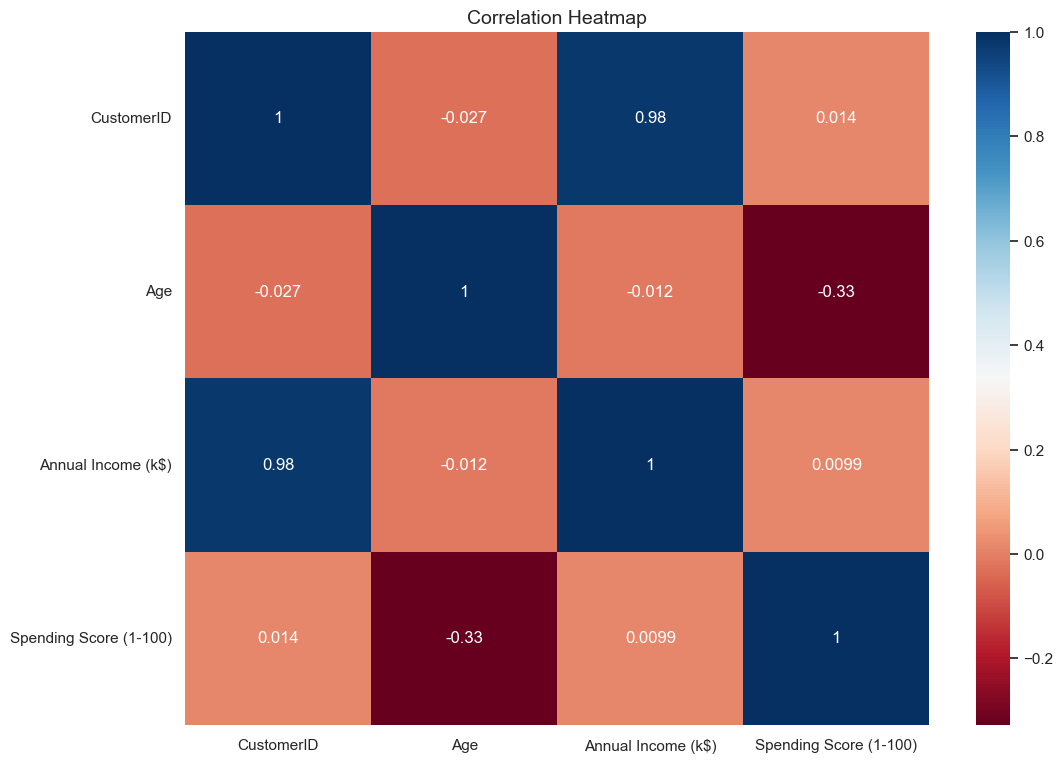

In [56]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Text(0.5, 1.0, 'Customer Spending Behavior')

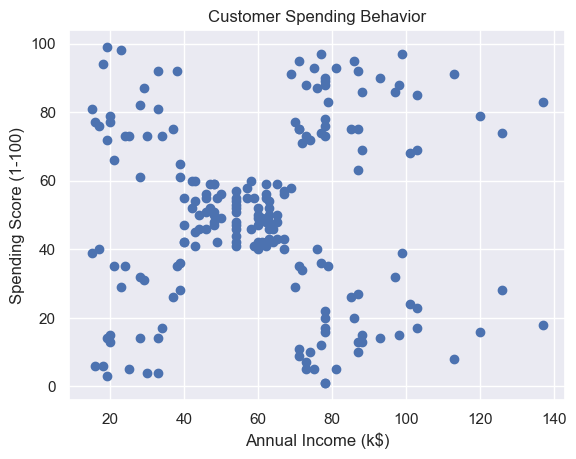

In [57]:
# Explore data visually 
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Spending Behavior')

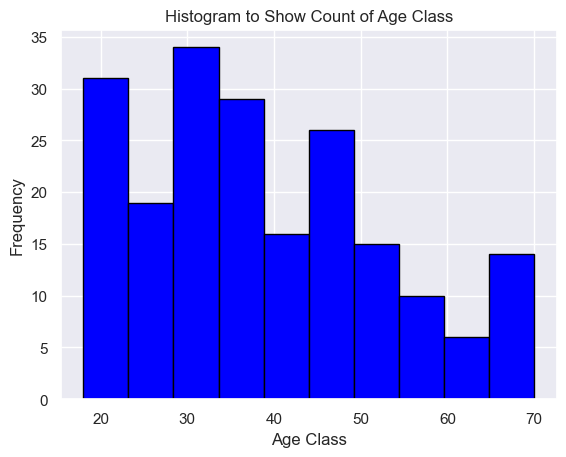

In [58]:
# Generate the histogram
customer_data = pd.read_csv('Mall_Customers.csv')

plt.hist(customer_data.Age,
         color="blue",
         edgecolor="black",
         bins=10)

# Customize the plot
plt.title("Histogram to Show Count of Age Class")
plt.xlabel("Age Class")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [59]:
# apply PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

Text(0, 0.5, 'WCSS')

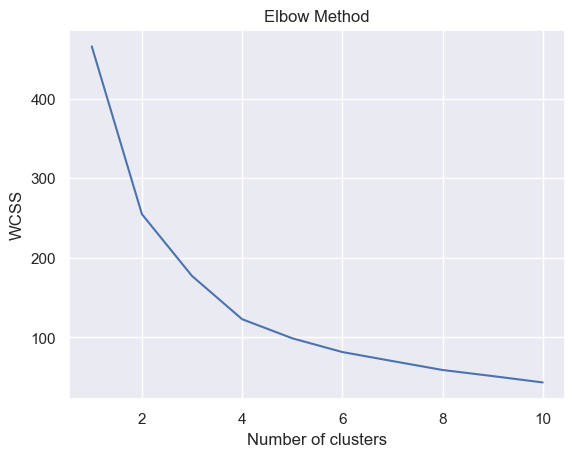

In [60]:
# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

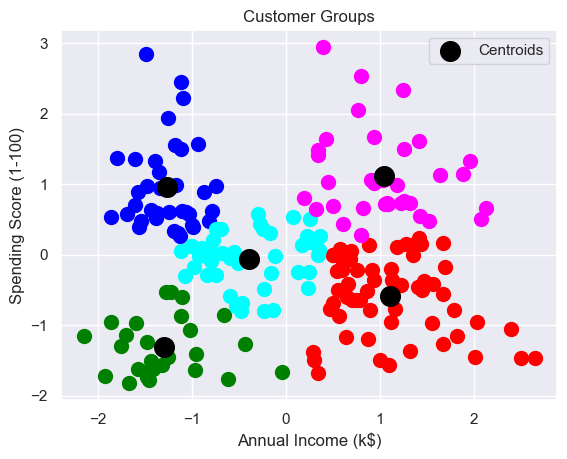

In [78]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(pca_df)

# Visualize clusters
plt.scatter(pca_df[y_kmeans == 0, 0], pca_df[y_kmeans == 0, 1], s=100, c='red')
plt.scatter(pca_df[y_kmeans == 1, 0], pca_df[y_kmeans == 1, 1], s=100, c='blue')
plt.scatter(pca_df[y_kmeans == 2, 0], pca_df[y_kmeans == 2, 1], s=100, c='green')
plt.scatter(pca_df[y_kmeans == 3, 0], pca_df[y_kmeans == 3, 1], s=100, c='cyan')
plt.scatter(pca_df[y_kmeans == 4, 0], pca_df[y_kmeans == 4, 1], s=100, c='magenta')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids',marker="o" )
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

In [62]:
print(f'Number of clusters: {kmeans.n_clusters}')
print(f'Cluster centers: {kmeans.cluster_centers_}')

Number of clusters: 5
Cluster centers: [[ 1.11177088 -0.59287373]
 [-1.26313613  0.96105994]
 [-1.29455069 -1.31287414]
 [-0.39088587 -0.05791634]
 [ 1.03849522  1.1199511 ]]
